In [108]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs
from geodatasets import get_path

path = get_path("naturalearth.land")
df = geopandas.read_file(path)

<Axes: >

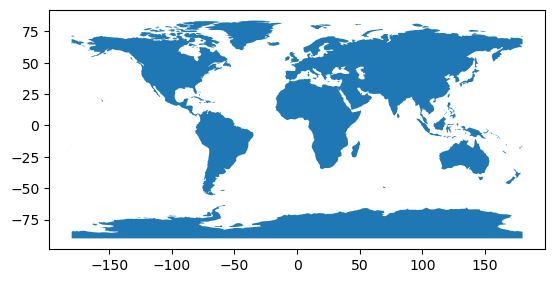

In [109]:
df.plot()

<Axes: >

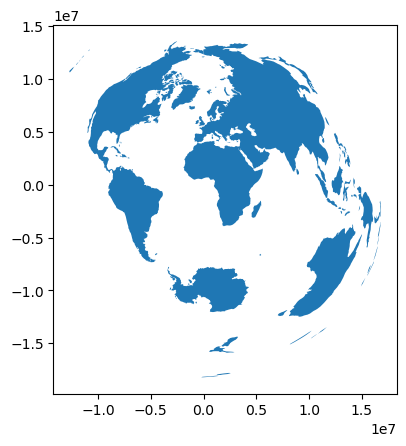

In [110]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

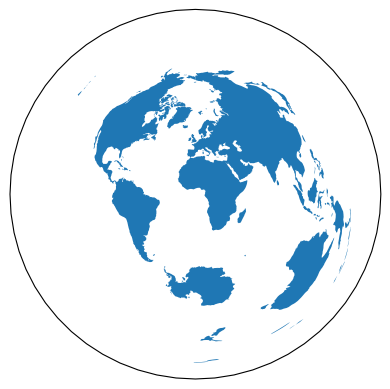

In [111]:
fig, ax = plt.subplots(subplot_kw={"projection": crs})
ax.add_geometries(df_ae["geometry"], crs=crs)

<GeoAxes: >

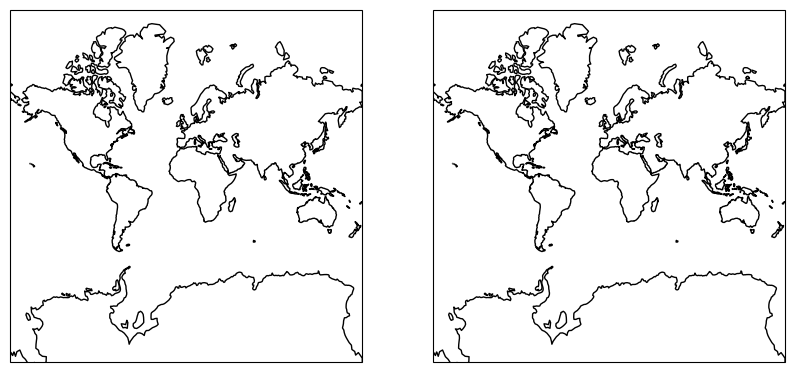

In [112]:
crs_epsg = ccrs.epsg("3857")
df_epsg = df.to_crs(epsg="3857")

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={"projection": crs_epsg}, figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(
    df_epsg["geometry"], crs=crs_epsg, facecolor="white", edgecolor="black"
)
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color="white", edgecolor="black")

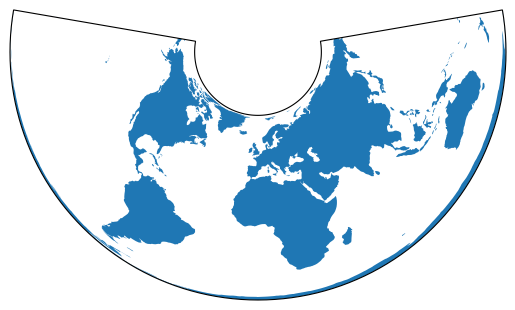

In [113]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [
    crs_new.project_geometry(ii, src_crs=crs) for ii in df_ae["geometry"].values
]

fig, ax = plt.subplots(subplot_kw={"projection": crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

<Axes: >

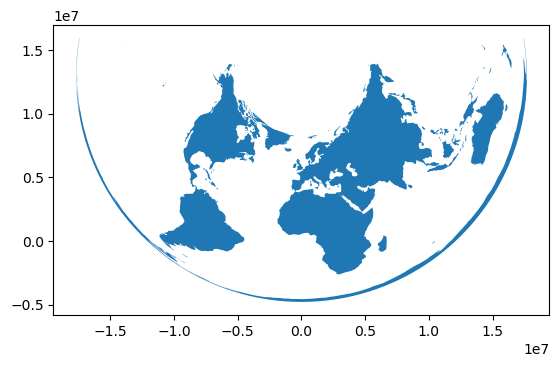

In [114]:
df_aea = geopandas.GeoDataFrame(
    df.drop(columns="geometry"), geometry=new_geometries, crs=crs_new.proj4_init
)
df_aea.plot()

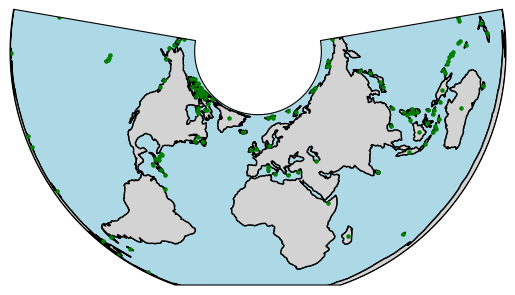

In [115]:
# Generate a CartoPy figure and add the countries to it
# Generate a CartoPy figure and add the countries to it
import cartopy.feature as cfeature
fig, ax = plt.subplots(subplot_kw={"projection": crs_new})
# Add ocean and land background colors
ax.add_feature(cfeature.OCEAN, facecolor="lightblue", zorder=0)
ax.add_feature(cfeature.LAND, facecolor="lightgrey", edgecolor="black", zorder=0)
# Draw the country geometries on top of the background
ax.add_geometries(new_geometries, crs=crs_new, facecolor="lightgrey", edgecolor="black", zorder=1)

# Calculate centroids and plot as green dots above polygons
df_aea_centroids = df_aea.geometry.centroid
# Smaller centroid markers for better visibility
df_aea_centroids.plot(ax=ax, markersize=5, color="green", zorder=2)

plt.show()

Saved plot to Project Folders\Figures\us_eco_l3_regions_corrected.png


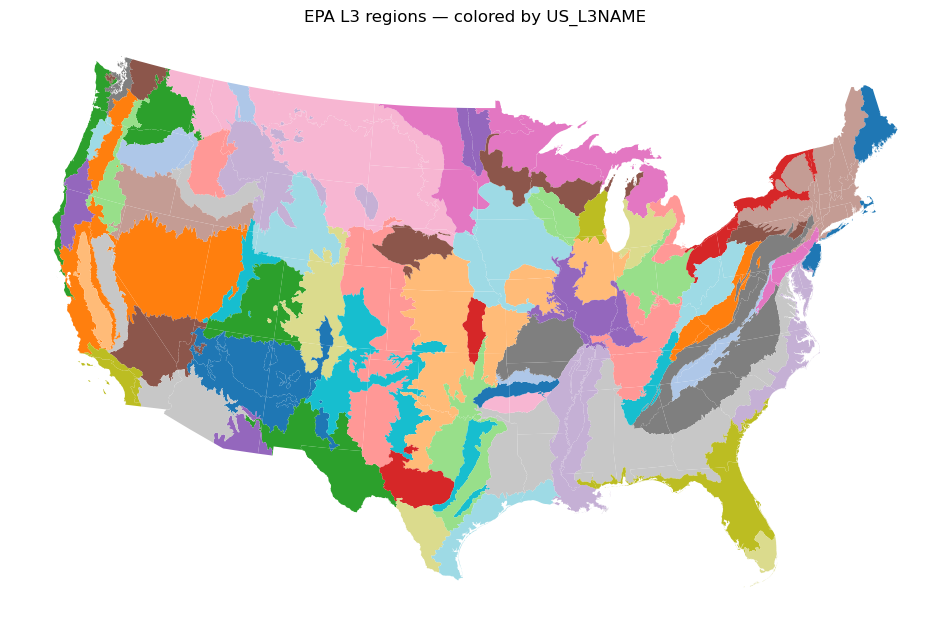

In [116]:
# Load EPA L3 shapefile and plot colored by EPA region
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

shp = r"C:\Users\maxke\Downloads\us_eco_l3_state_boundaries\us_eco_l3_state_boundaries.shp"
out_dir = Path("Project Folders") / "Figures"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "us_eco_l3_regions_corrected.png"

gdf = gpd.read_file(shp)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# Use the L3 region name for categorical coloring (US_L3NAME) — no inline legend
gdf.plot(column='US_L3NAME', cmap='tab20', legend=False, linewidth=0.2, ax=ax)
ax.set_title('EPA L3 regions — colored by US_L3NAME')
ax.axis('off')
plt.savefig(str(out_path), bbox_inches='tight', dpi=150)
print('Saved plot to', out_path)

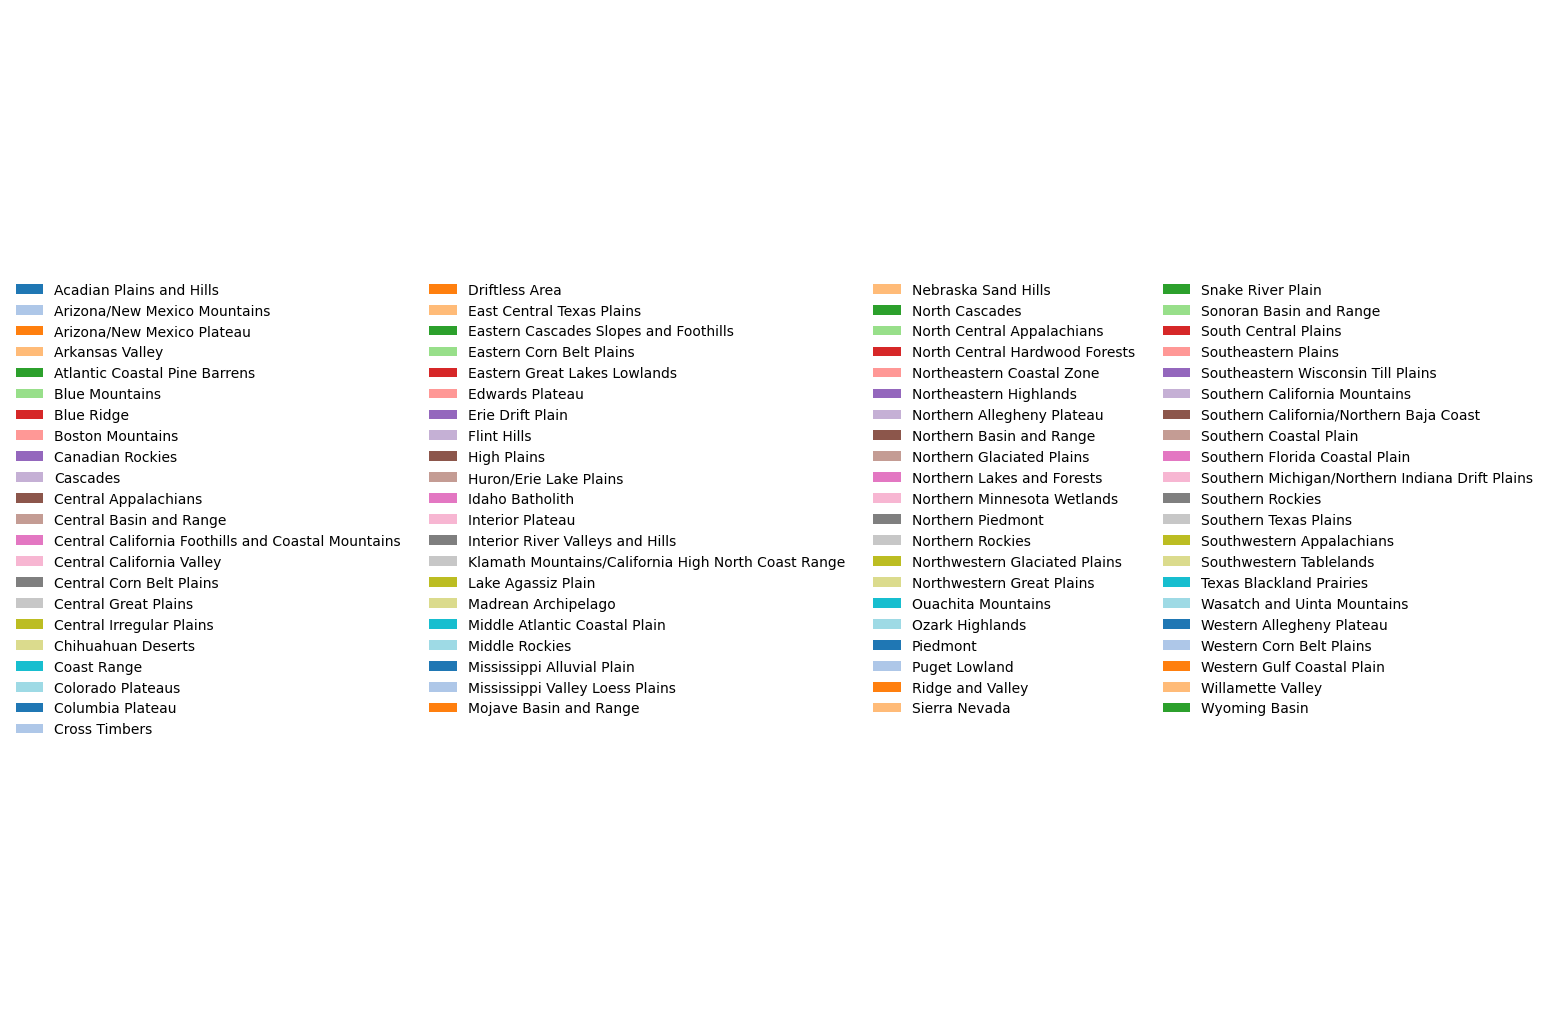

Saved legend to Project Folders\Figures\us_eco_l3_legend.png


In [117]:
# Render and save a separate legend for US_L3NAME categories
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path

shp = r"C:\Users\maxke\Downloads\us_eco_l3_state_boundaries\us_eco_l3_state_boundaries.shp"
out_dir = Path("Project Folders") / "Figures"
out_dir.mkdir(parents=True, exist_ok=True)
legend_path = out_dir / "us_eco_l3_legend.png"

gdf = gpd.read_file(shp)
col = 'US_L3NAME'
unique = sorted(gdf[col].unique())
cmap = plt.get_cmap('tab20')
colors = {cat: cmap(i % cmap.N) for i, cat in enumerate(unique)}
handles = [Patch(facecolor=colors[cat], label=cat) for cat in unique]
# Create a figure for the legend only
fig, ax = plt.subplots(figsize=(12, 3 + max(0, len(unique)//8)))
ax.axis('off')
legend = ax.legend(handles=handles, loc='center', ncol=4, frameon=False)
plt.savefig(str(legend_path), bbox_inches='tight', dpi=150)
plt.show()
print('Saved legend to', legend_path)

In [ ]:
#Claude Haiku 4.5 was used on this assignment.
#Max Keller 2/17/26